In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

un_encode Client country 

In [3]:
pd.set_option('display.max_columns', 200)
df = pd.read_csv('/Users/sele/Desktop/AUS FALL 24/repositories/Data-Mining-Project/Preprocessing/Feature Cleaners/Numeric_Cleaned_Sol.csv')
df_encoded = pd.read_csv('/Users/sele/Desktop/AUS FALL 24/repositories/Data-Mining-Project/Preprocessing/encoded_data.csv')
df.head()


,Job Title,EX_level_demand,Search_Keyword,Description,Category_1,highlight,Category_2,Category_3,Category_4,Category_5,Category_6,Category_7,Category_8,Category_9,Applicants_Num,Payment_Situation,Spent,Client_Country,Connects,Feedback_Num,Payment_type,Job_Cost,Hourly_Rate
0,Power bi specialist freelance,Expert,Data_science,Already data pooled and designed. Need to refi...,Data Analysis,data,Data Visualization,Microsoft Power BI,SQL,NaN,NaN,NaN,NaN,NaN,2.5,Payment unverified,0.0,United States,12.0,0.0,Fixed-price,2500.0,NaN
1,Case Study (on-demand delivery startup),Intermediate,Data_science,"Hi,\n\nWould you be able to help me do a case-...",Google Data Studio,Google Data Studio,SQL,Tableau,Microsoft Excel,Microsoft PowerPoint,Python,Analytics,Visualization,NaN,2.5,Payment verified,100.0,Canada,8.0,1.0,Fixed-price,200.0,NaN
2,"File Maker Pro Reports, Charts, Query and Ongo...",Intermediate,Data_science,NITIAL PROJECT\n\nSet up Monthly Report mimick...,Report Writing,NaN,Custom Graphics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,Payment verified,200.0,United States,12.0,1.0,Hourly,NaN,40.0
3,Implementation of EleutherAI/gpt-neox-20b,Expert,Data_science,"As a first step, you will implement the instal...",Machine Learning Model,NaN,Machine Learning,Python,NaN,NaN,NaN,NaN,NaN,NaN,2.5,Payment verified,100000.0,Canada,12.0,26.0,Hourly,NaN,67.5
4,Computer vision / machine learning: synthetic ...,Expert,Data_science,Our company is working on a government proposa...,Generative Adversarial Network,data,Machine Learning,Computer Vision,Neural Network,NaN,NaN,NaN,NaN,NaN,2.5,Payment verified,100000.0,United States,12.0,11.0,Hourly,NaN,125.0


In [4]:
missing = df.isnull().sum()
missing

Job Title                0
EX_level_demand          0
Search_Keyword           0
Description              0
Category_1             325
highlight            10514
Category_2            3244
Category_3            7190
Category_4           13172
Category_5           19596
Category_6           26147
Category_7           30884
Category_8           34497
Category_9           37453
Applicants_Num           0
Payment_Situation        0
Spent                    0
Client_Country           0
Connects                 0
Feedback_Num             0
Payment_type             0
Job_Cost             26502
Hourly_Rate          20016
dtype: int64

In [5]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

nominal_vars = ['Payment_type', 'Payment_Situation']  
ordinal_vars = ['EX_level_demand']
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_nominal = onehot_encoder.fit_transform(df[nominal_vars])
encoded_nominal_df = pd.DataFrame(encoded_nominal, columns=onehot_encoder.get_feature_names_out(nominal_vars))

ordinal_encoder = OrdinalEncoder()
encoded_ordinal = ordinal_encoder.fit_transform(df[ordinal_vars])
encoded_ordinal_df = pd.DataFrame(encoded_ordinal, columns=ordinal_vars)
encoded_ordinal_df.value_counts()


EX_level_demand
2.0                26383
1.0                15795
0.0                 4340
Name: count, dtype: int64

In [6]:
df.loc[df['Applicants_Num'] =='50+', 'Applicants_Num'] = 50
applicants_num = df['Applicants_Num'].astype(float)
applicants_num = np.ceil(applicants_num)

In [7]:
numericals = df.select_dtypes(include=['float64', 'int64'])

In [8]:
numericals.loc[numericals['Spent'] ==0].shape

(19945, 5)

In [9]:
numericals['Spent'] = np.log(numericals['Spent'] + 1)
feedback = np.log(numericals['Feedback_Num'] +1)
numericals['Feedback_Num'] = feedback
numericals = pd.concat([numericals, applicants_num], axis=1)
numericals.head()

,Spent,Connects,Feedback_Num,Job_Cost,Hourly_Rate,Applicants_Num
0,0.000000,12.0,0.000000,2500.0,NaN,3.0
1,4.615121,8.0,0.693147,200.0,NaN,3.0
2,5.303305,12.0,0.693147,NaN,40.0,3.0
3,11.512935,12.0,3.295837,NaN,67.5,3.0
4,11.512935,12.0,2.484907,NaN,125.0,3.0


In [10]:
norm_ord = pd.concat([encoded_nominal_df, encoded_ordinal_df], axis=1)

In [11]:
norm_ord.head()

,Payment_type_Hourly,Payment_Situation_Payment verified,EX_level_demand
0,0.0,0.0,1.0
1,0.0,1.0,2.0
2,1.0,1.0,2.0
3,1.0,1.0,1.0
4,1.0,1.0,1.0


In [12]:
encoded_final = pd.concat([norm_ord, numericals], axis=1)
encoded_final.shape

(46518, 9)

In [13]:
encoded_final['Client_Country'] = df['Client_Country']

In [14]:
encoded_final = encoded_final.drop([46516,46517], axis=0)
print("DataFrame after dropping 'row2':")
encoded_final.shape

DataFrame after dropping 'row2':


(46516, 10)

In [15]:
encoded_final.head()

,Payment_type_Hourly,Payment_Situation_Payment verified,EX_level_demand,Spent,Connects,Feedback_Num,Job_Cost,Hourly_Rate,Applicants_Num,Client_Country
0,0.0,0.0,1.0,0.000000,12.0,0.000000,2500.0,NaN,3.0,United States
1,0.0,1.0,2.0,4.615121,8.0,0.693147,200.0,NaN,3.0,Canada
2,1.0,1.0,2.0,5.303305,12.0,0.693147,NaN,40.0,3.0,United States
3,1.0,1.0,1.0,11.512935,12.0,3.295837,NaN,67.5,3.0,Canada
4,1.0,1.0,1.0,11.512935,12.0,2.484907,NaN,125.0,3.0,United States


In [16]:
gpt = pd.read_csv('/Users/sele/Desktop/AUS FALL 24/repositories/Data-Mining-Project/Dataset/encoded_data_gpt_imputed.csv')

In [17]:
gpt.head()

,Job Title,Search_Keyword,Description,Category_1,highlight,Category_2,Category_3,Category_4,Category_5,Category_6,Category_7,Category_8,Category_9,Client_Country_Albania,Client_Country_Algeria,Client_Country_American Samoa,Client_Country_Andorra,Client_Country_Angola,Client_Country_Anguilla,Client_Country_Antigua and Barbuda,Client_Country_Argentina,Client_Country_Armenia,Client_Country_Australia,Client_Country_Austria,Client_Country_Azerbaijan,Client_Country_Bahamas,Client_Country_Bahrain,Client_Country_Bangladesh,Client_Country_Barbados,Client_Country_Belarus,Client_Country_Belgium,Client_Country_Belize,Client_Country_Benin,Client_Country_Bermuda,Client_Country_Bolivia,Client_Country_Bosnia and Herzegovina,Client_Country_Botswana,Client_Country_Brazil,Client_Country_British Indian Ocean Territory,Client_Country_British Virgin Islands,Client_Country_Brunei Darussalam,Client_Country_Bulgaria,Client_Country_Burkina Faso,Client_Country_Cambodia,Client_Country_Cameroon,Client_Country_Canada,Client_Country_Cayman Islands,Client_Country_Chile,Client_Country_China,Client_Country_Colombia,"Client_Country_Congo, the Democratic Republic of the",Client_Country_Costa Rica,Client_Country_Cote d'Ivoire,Client_Country_Croatia,Client_Country_Curacao,Client_Country_Cyprus,Client_Country_Czech Republic,Client_Country_Denmark,Client_Country_Dominican Republic,Client_Country_Ecuador,Client_Country_Egypt,Client_Country_El Salvador,Client_Country_Estonia,Client_Country_Ethiopia,Client_Country_Finland,Client_Country_France,Client_Country_Gambia,Client_Country_Georgia,Client_Country_Germany,Client_Country_Ghana,Client_Country_Gibraltar,Client_Country_Greece,Client_Country_Greenland,Client_Country_Grenada,Client_Country_Guadeloupe,Client_Country_Guatemala,Client_Country_Guernsey,Client_Country_Guinea,Client_Country_Guyana,Client_Country_Haiti,Client_Country_Honduras,Client_Country_Hong Kong,Client_Country_Hungary,Client_Country_Iceland,Client_Country_India,Client_Country_Indonesia,Client_Country_Ireland,Client_Country_Isle of Man,Client_Country_Israel,Client_Country_Italy,Client_Country_Jamaica,Client_Country_Japan,Client_Country_Jersey,Client_Country_Jordan,Client_Country_Kazakhstan,Client_Country_Kenya,Client_Country_Kuwait,Client_Country_Kyrgyzstan,Client_Country_Laos,Client_Country_Latvia,...,Client_Country_Liechtenstein,Client_Country_Lithuania,Client_Country_Luxembourg,Client_Country_Macao,Client_Country_Macedonia,Client_Country_Malawi,Client_Country_Malaysia,Client_Country_Maldives,Client_Country_Mali,Client_Country_Malta,Client_Country_Mauritius,Client_Country_Mexico,"Client_Country_Micronesia, Federated States of",Client_Country_Moldova,Client_Country_Monaco,Client_Country_Mongolia,Client_Country_Montenegro,Client_Country_Morocco,Client_Country_Mozambique,Client_Country_Myanmar,Client_Country_Namibia,Client_Country_Nepal,Client_Country_Netherlands,Client_Country_New Caledonia,Client_Country_New Zealand,Client_Country_Nicaragua,Client_Country_Nigeria,Client_Country_Norway,Client_Country_Oman,Client_Country_Pakistan,Client_Country_Palestinian Territories,Client_Country_Panama,Client_Country_Papua New Guinea,Client_Country_Paraguay,Client_Country_Peru,Client_Country_Philippines,Client_Country_Poland,Client_Country_Portugal,Client_Country_Puerto Rico,Client_Country_Qatar,Client_Country_Romania,Client_Country_Russia,Client_Country_Rwanda,Client_Country_Saint Kitts and Nevis,Client_Country_Saint Lucia,Client_Country_Saint Martin (French part),Client_Country_Saint Vincent and the Grenadines,Client_Country_San Marino,Client_Country_Saudi Arabia,Client_Country_Senegal,Client_Country_Serbia,Client_Country_Seychelles,Client_Country_Sierra Leone,Client_Country_Singapore,Client_Country_Slovakia,Client_Country_Slovenia,Client_Country_Somalia,Client_Country_South Africa,Client_Country_South Korea,Client_Country_Spain,Client_Country_Sri Lanka,Client_Country_Suriname,Client_Country_Swaziland,Client_Country_Sweden,Client_Country_Switzerland,Client_Country_Tai

In [18]:
missing_indexes = numericals.index.difference(gpt.index)

print("Missing indexes:", missing_indexes)

missing_rows = numericals.loc[missing_indexes]
print("Missing rows:")
print(missing_rows)

Missing indexes: RangeIndex(start=46516, stop=46518, step=1)
Missing rows:
           Spent  Connects  Feedback_Num  Job_Cost  Hourly_Rate  \
46516  10.308986      12.0      4.290459       NaN         32.5   
46517   9.210440      12.0      1.609438       NaN         44.0   

       Applicants_Num  
46516            13.0  
46517             8.0  


In [19]:
tree_data = gpt[['Category 1', 'Category 2', 'Category 3']]
tree_data.head()

,Category 1,Category 2,Category 3
0,Data Analysis and Visualization,ETL,"SQL, Excel"
1,Data Analysis and Visualization,Excel,"SQL, Python"
2,Data Analysis and Visualization,Data Engineering,"Excel, Other"
3,Algorithm development,DevOps and CI/CD,"Docker, Other"
4,3d modeling,Machine Learning,"Python, TensorFlow, PyTorch, Computer Vision"


In [20]:
final_data = pd.concat([tree_data, encoded_final], axis=1)
final_data.head()

,Category 1,Category 2,Category 3,Payment_type_Hourly,Payment_Situation_Payment verified,EX_level_demand,Spent,Connects,Feedback_Num,Job_Cost,Hourly_Rate,Applicants_Num,Client_Country
0,Data Analysis and Visualization,ETL,"SQL, Excel",0.0,0.0,1.0,0.000000,12.0,0.000000,2500.0,NaN,3.0,United States
1,Data Analysis and Visualization,Excel,"SQL, Python",0.0,1.0,2.0,4.615121,8.0,0.693147,200.0,NaN,3.0,Canada
2,Data Analysis and Visualization,Data Engineering,"Excel, Other",1.0,1.0,2.0,5.303305,12.0,0.693147,NaN,40.0,3.0,United States
3,Algorithm development,DevOps and CI/CD,"Docker, Other",1.0,1.0,1.0,11.512935,12.0,3.295837,NaN,67.5,3.0,Canada
4,3d modeling,Machine Learning,"Python, TensorFlow, PyTorch, Computer Vision",1.0,1.0,1.0,11.512935,12.0,2.484907,NaN,125.0,3.0,United States


In [21]:
final_data.shape

(46516, 13)

## CLEANED DATA ##

In [22]:
hourly_data = final_data[final_data['Payment_type_Hourly'] == 1].copy()
fixed_data = final_data[final_data['Payment_type_Hourly'] == 0].copy()
hourly_data.drop(['Payment_type_Hourly', 'Job_Cost'],axis=1, inplace=True)
fixed_data.drop(['Payment_type_Hourly','Hourly_Rate'],axis=1, inplace=True)

In [23]:
#hourly_data = hourly_data.to_csv('/Users/sele/Desktop/AUS FALL 24/repositories/Data-Mining-Project/Dataset/hourly_data.csv')
#fixed_data = fixed_data.to_csv('/Users/sele/Desktop/AUS FALL 24/repositories/Data-Mining-Project/Dataset/fixed_data.csv')

In [24]:
def correlation_matrix(data, target):

    correlation_matrix = data.corr(numeric_only=True, method = 'spearman')

    # Extract correlations between all features and the target
    target_correlations = correlation_matrix[[target]].sort_values(by=target, ascending=False)

    # Plot heatmap for correlations with the target
    plt.figure(figsize=(10, 8))
    sns.heatmap(target_correlations, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
    plt.title(f"Feature Correlations with {target} -- Spearman")
    plt.show() 

    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
    plt.title(f"Correlation Heatmap of All Features - {target} - Spearman")
    plt.show()

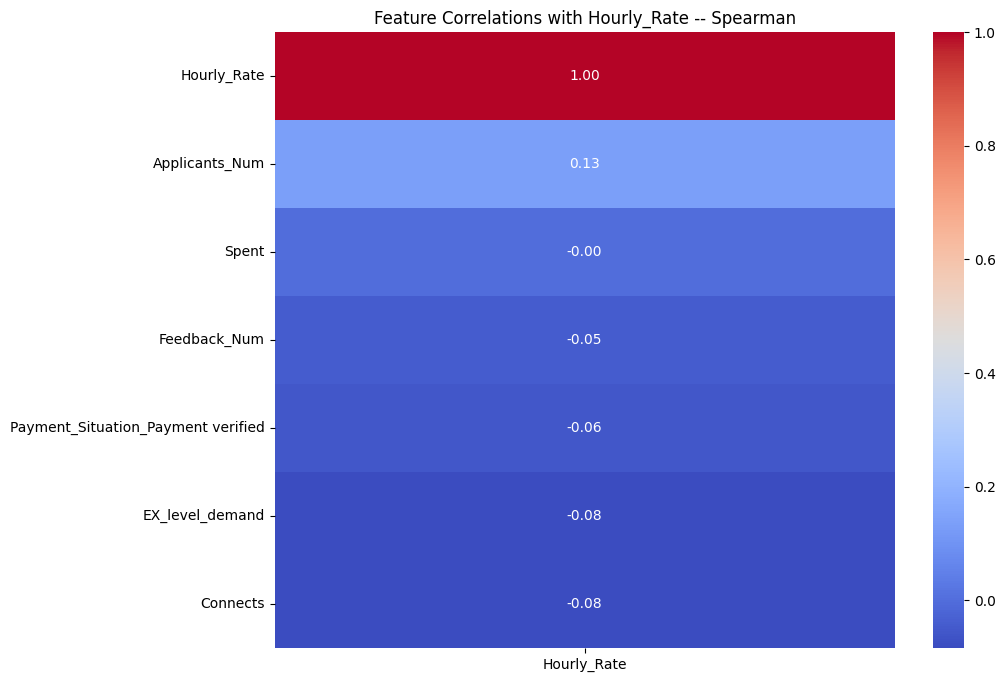

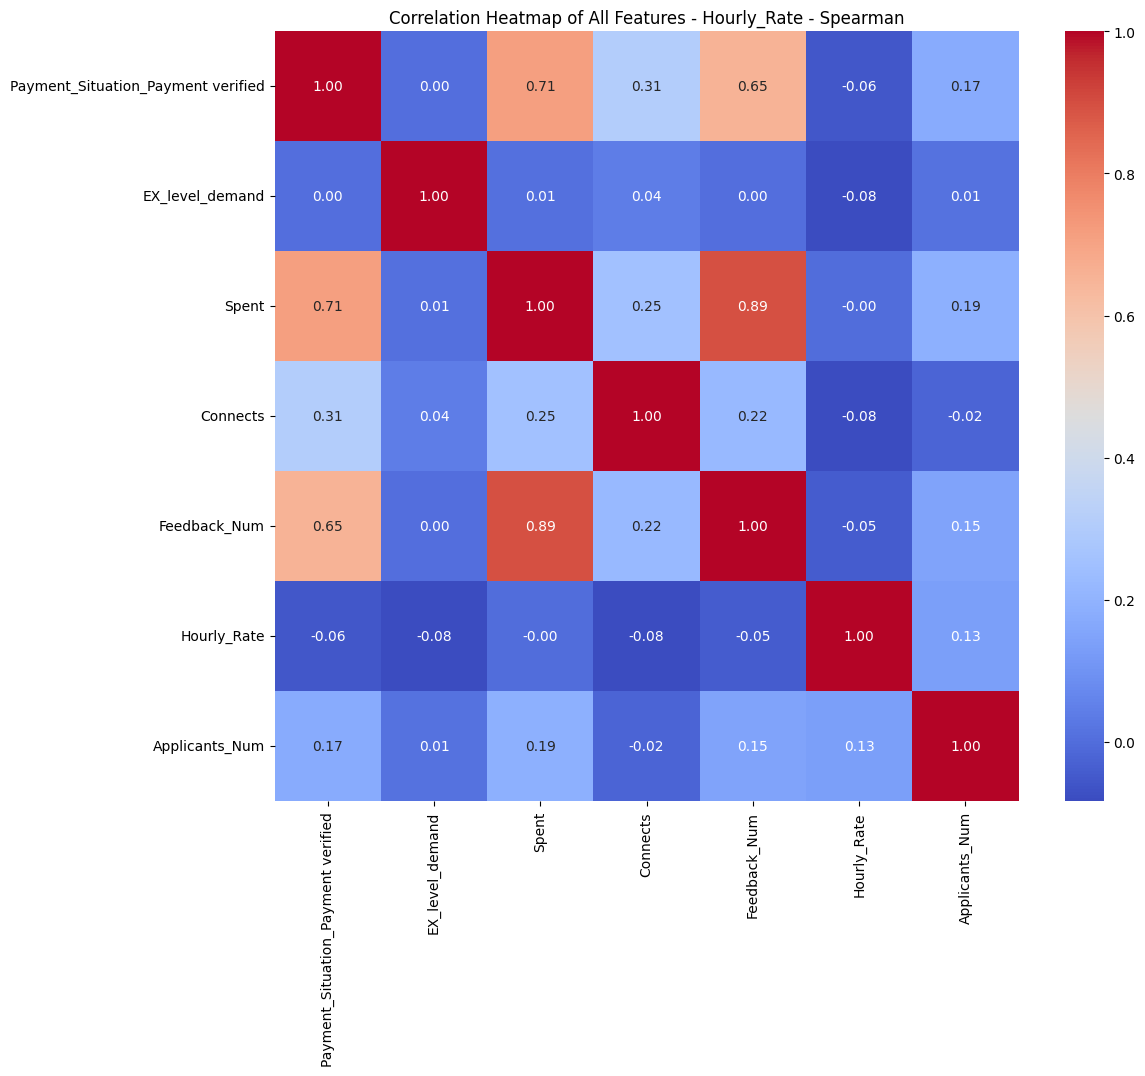

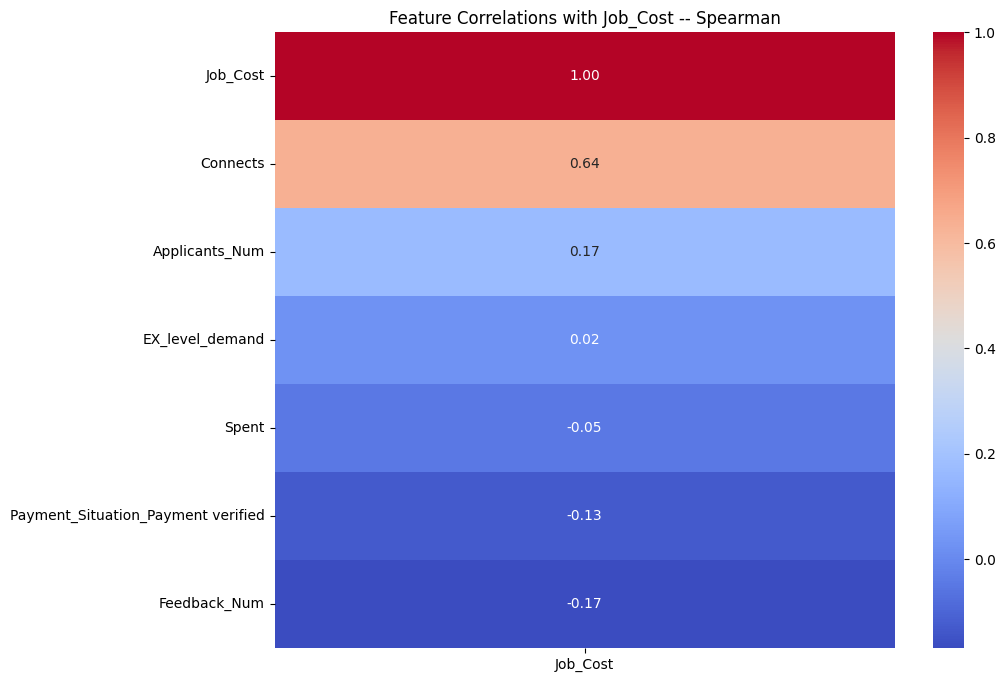

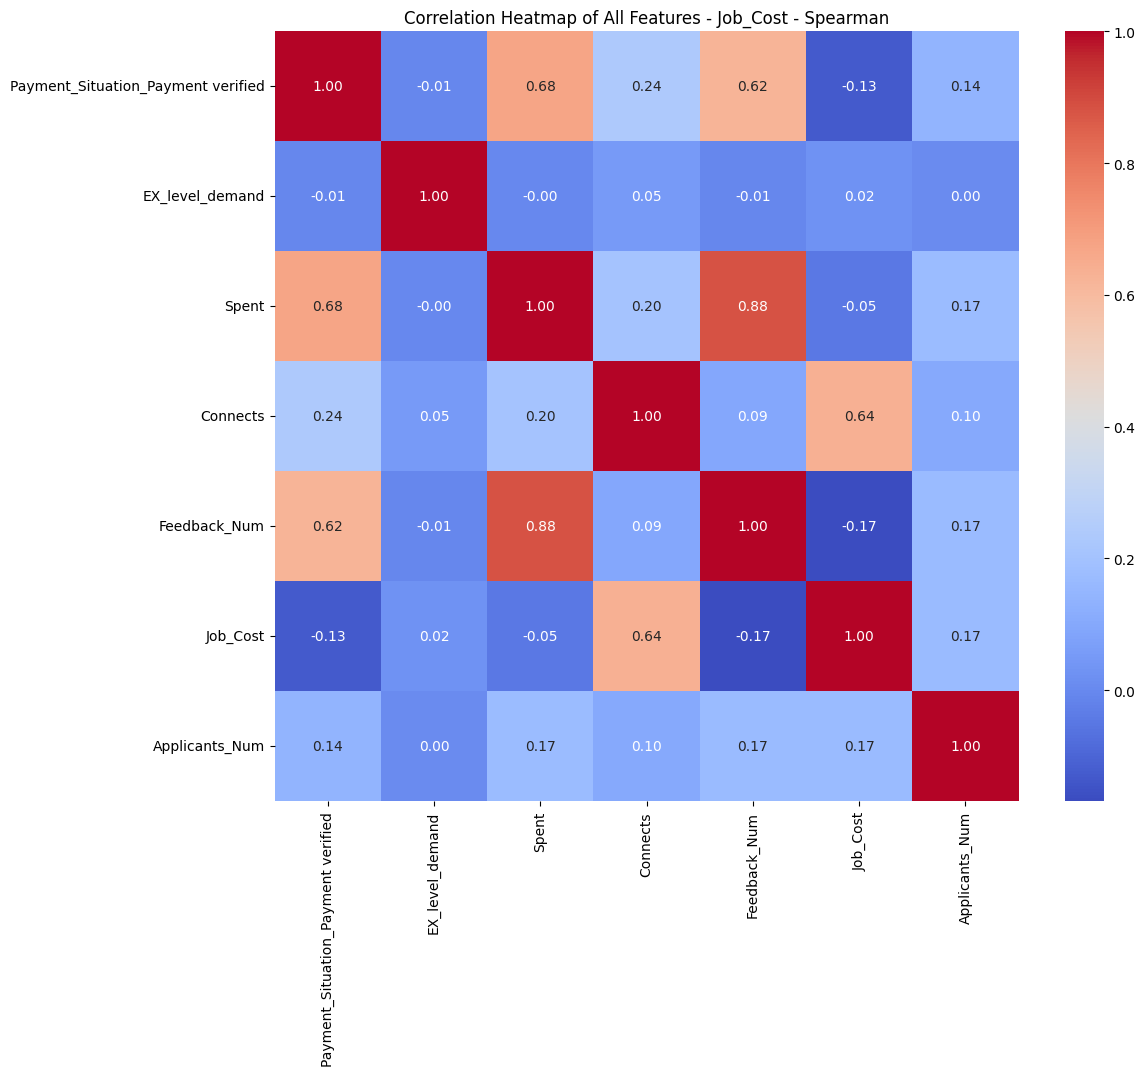

In [25]:
correlation_matrix(hourly_data,'Hourly_Rate')
correlation_matrix(fixed_data,'Job_Cost')

<AxesSubplot: xlabel='Hourly_Rate', ylabel='Client_Country'>

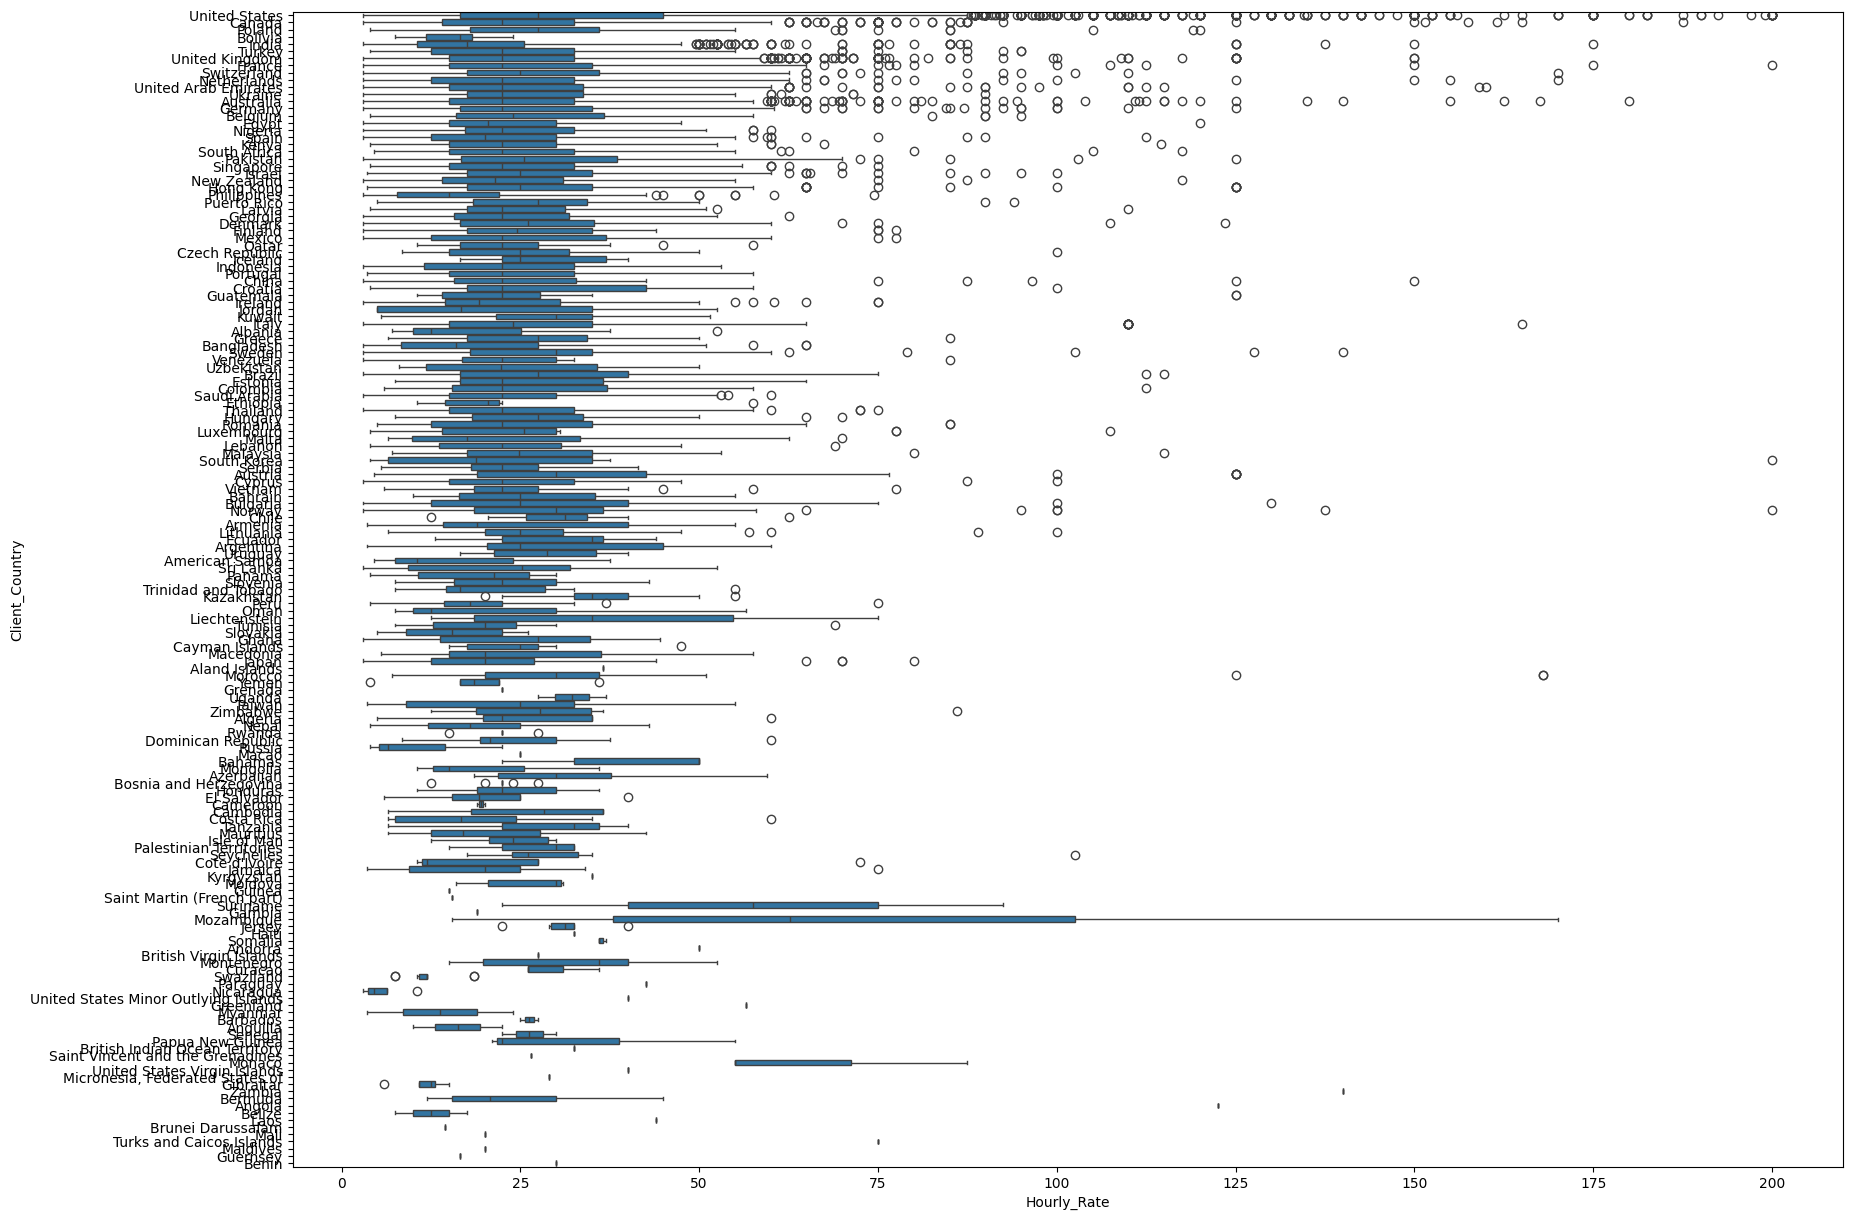

In [26]:
plt.figure(figsize=(20, 15))
sns.boxplot(y=hourly_data['Client_Country'], x=hourly_data['Hourly_Rate'])

<AxesSubplot: xlabel='Client_Country', ylabel='Hourly_Rate'>

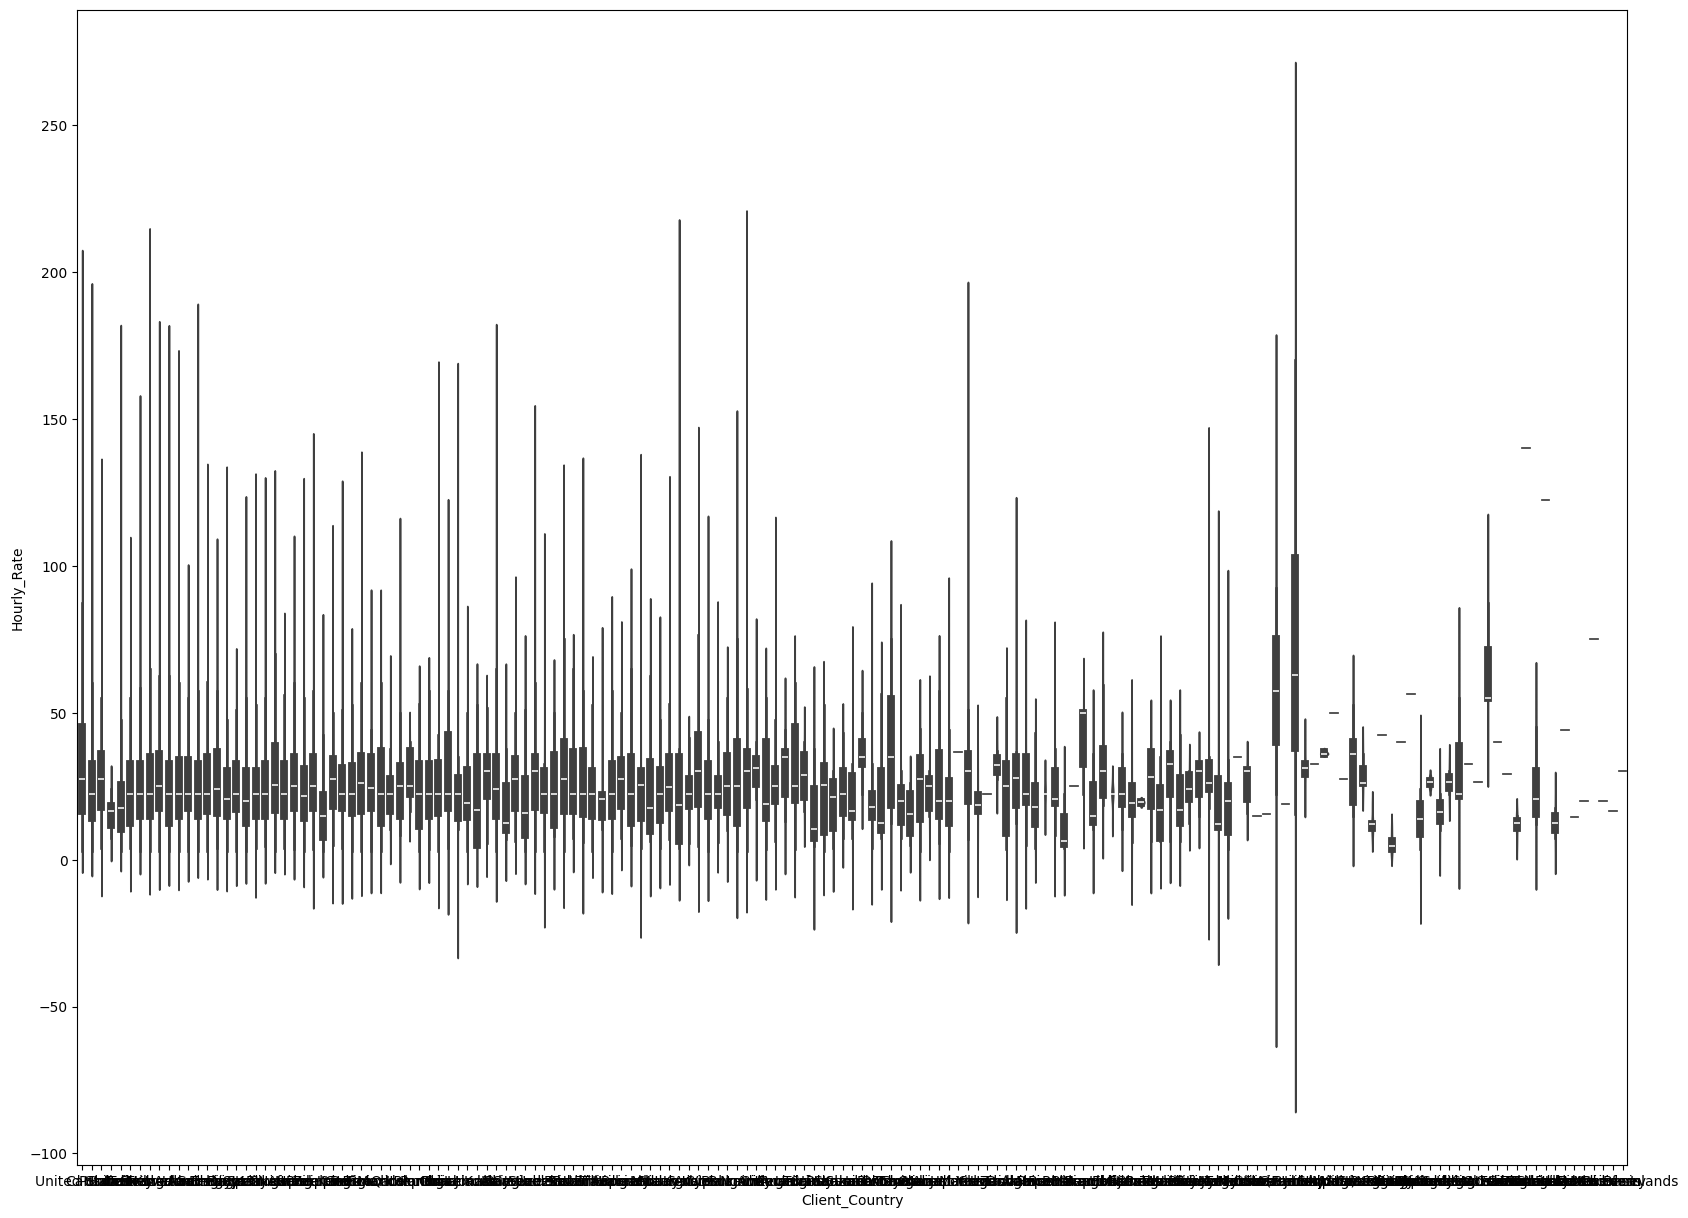

In [27]:
plt.figure(figsize=(20,15))
sns.violinplot(x=hourly_data['Client_Country'], y=hourly_data['Hourly_Rate'])

In [28]:
hourly_data.shape

(26500, 11)

In [29]:
nndata = hourly_data.copy()
nndata['Category 2'].fillna('', inplace=True)
nndata['Category 1'].fillna('', inplace=True)


In [30]:
nnfixed = fixed_data.copy()


In [31]:
nndata.shape

(26500, 11)

In [32]:
nndata['Combined'] = nndata['Category 1'] + ' ' + nndata['Category 2'] + ' ' + nndata['Category 3']
nndata.drop(['Category 1', 'Category 2', 'Category 3'], axis=1, inplace=True)

In [33]:
nndata.head()

,Payment_Situation_Payment verified,EX_level_demand,Spent,Connects,Feedback_Num,Hourly_Rate,Applicants_Num,Client_Country,Combined
2,1.0,2.0,5.303305,12.0,0.693147,40.0,3.0,United States,Data Analysis and Visualization Data Engineeri...
3,1.0,1.0,11.512935,12.0,3.295837,67.5,3.0,Canada,"Algorithm development DevOps and CI/CD Docker,..."
4,1.0,1.0,11.512935,12.0,2.484907,125.0,3.0,United States,"3d modeling Machine Learning Python, TensorFlo..."
6,1.0,2.0,0.000000,12.0,0.000000,30.0,3.0,Poland,"BI and Analytics Data Engineering SQL, Other"
7,0.0,2.0,0.000000,4.0,0.000000,16.5,3.0,Bolivia,Data Analysis and Visualization API Developmen...


In [34]:
nndata['Hourly_Rate'].isna().sum()

0

In [35]:
nndata['Combined'] = nndata['Combined'].astype(str)


In [36]:
missing = nndata.isnull().sum()
missing

Payment_Situation_Payment verified    0
EX_level_demand                       0
Spent                                 0
Connects                              0
Feedback_Num                          0
Hourly_Rate                           0
Applicants_Num                        0
Client_Country                        0
Combined                              0
dtype: int64

In [37]:
numerics = nndata[['EX_level_demand','Spent', 'Connects','Feedback_Num', 'Applicants_Num' ]]
numerics.shape

(26500, 5)

In [38]:
nnfixed['Category 1'].fillna('', inplace=True)
nnfixed['Category 2'].fillna('', inplace=True)
nnfixed['Combined'] = nnfixed['Category 1'] + ' ' + nnfixed['Category 2'] + ' ' + nnfixed['Category 3']
nnfixed.drop(['Category 1', 'Category 2', 'Category 3'], axis=1, inplace=True)
nnfixed['Combined'] = nnfixed['Combined'].astype(str)
numerics_fixed = nnfixed[['EX_level_demand','Spent', 'Connects','Feedback_Num', 'Applicants_Num' ]]
numerics.shape

(26500, 5)

In [39]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_hourly = scaler.fit_transform(numerics)
scaled_hourly = pd.DataFrame(scaled_hourly, columns=numerics.columns, index=numerics.index)
scaled_fixed = scaler.fit_transform(numerics_fixed)
scaled_fixed = pd.DataFrame(scaled_fixed, columns=numerics_fixed.columns, index=numerics_fixed.index)


In [40]:
nndata.drop(['EX_level_demand','Spent', 'Connects','Feedback_Num', 'Applicants_Num'], axis=1, inplace=True)
nnfixed.drop(['EX_level_demand','Spent', 'Connects','Feedback_Num', 'Applicants_Num'], axis=1, inplace=True)
nndata.shape


(26500, 4)

In [41]:
print(f"Rows in nndata: {nnfixed.shape[0]}")
print(f"Rows in scaled_features: {scaled_fixed.shape[0]}")

Rows in nndata: 20016
Rows in scaled_features: 20016


In [42]:
nndata =pd.concat([nndata, scaled_hourly], axis=1)
nnfixed =pd.concat([nnfixed, scaled_fixed], axis=1)

In [43]:
nndata.shape

(26500, 9)

In [44]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse_output=False)

#Hourly
encoded_nominal_hourly = onehot_encoder.fit_transform(nndata['Client_Country'].values.reshape(-1, 1))
encoded_nominal_hourly = pd.DataFrame(encoded_nominal_hourly, columns=onehot_encoder.get_feature_names_out(['Client_Country']),index=nndata.index)

#Fixed
encoded_nominal_fixed = onehot_encoder.fit_transform(nnfixed['Client_Country'].values.reshape(-1, 1))
encoded_nominal_fixed = pd.DataFrame(encoded_nominal_fixed, columns=onehot_encoder.get_feature_names_out(['Client_Country']),index=nnfixed.index)





In [45]:
nndata = pd.concat([nndata.drop(['Client_Country'], axis=1), encoded_nominal_hourly], axis=1)
nnfixed = pd.concat([nnfixed.drop(['Client_Country'], axis=1), encoded_nominal_fixed], axis=1)
nnfixed.shape

(20016, 169)

ordinal and numerical features are scaled (minmax)


Client_country is onehot encoded

In [46]:
nnfixed.head()

,Payment_Situation_Payment verified,Job_Cost,Combined,EX_level_demand,Spent,Connects,Feedback_Num,Applicants_Num,Client_Country_Albania,Client_Country_Algeria,Client_Country_American Samoa,Client_Country_Andorra,Client_Country_Angola,Client_Country_Antigua and Barbuda,Client_Country_Argentina,Client_Country_Armenia,Client_Country_Australia,Client_Country_Austria,Client_Country_Azerbaijan,Client_Country_Bahamas,Client_Country_Bahrain,Client_Country_Bangladesh,Client_Country_Barbados,Client_Country_Belarus,Client_Country_Belgium,Client_Country_Belize,Client_Country_Benin,Client_Country_Bermuda,Client_Country_Bolivia,Client_Country_Bosnia and Herzegovina,Client_Country_Botswana,Client_Country_Brazil,Client_Country_Bulgaria,Client_Country_Burkina Faso,Client_Country_Cambodia,Client_Country_Cameroon,Client_Country_Canada,Client_Country_Cayman Islands,Client_Country_Chile,Client_Country_China,Client_Country_Colombia,"Client_Country_Congo, the Democratic Republic of the",Client_Country_Costa Rica,Client_Country_Cote d'Ivoire,Client_Country_Croatia,Client_Country_Curacao,Client_Country_Cyprus,Client_Country_Czech Republic,Client_Country_Denmark,Client_Country_Dominican Republic,Client_Country_Ecuador,Client_Country_Egypt,Client_Country_El Salvador,Client_Country_Estonia,Client_Country_Ethiopia,Client_Country_Finland,Client_Country_France,Client_Country_Georgia,Client_Country_Germany,Client_Country_Ghana,Client_Country_Gibraltar,Client_Country_Greece,Client_Country_Greenland,Client_Country_Guadeloupe,Client_Country_Guatemala,Client_Country_Guernsey,Client_Country_Guinea,Client_Country_Guyana,Client_Country_Honduras,Client_Country_Hong Kong,Client_Country_Hungary,Client_Country_Iceland,Client_Country_India,Client_Country_Indonesia,Client_Country_Ireland,Client_Country_Isle of Man,Client_Country_Israel,Client_Country_Italy,Client_Country_Jamaica,Client_Country_Japan,Client_Country_Jersey,Client_Country_Jordan,Client_Country_Kazakhstan,Client_Country_Kenya,Client_Country_Kuwait,Client_Country_Kyrgyzstan,Client_Country_Latvia,Client_Country_Lebanon,Client_Country_Lithuania,Client_Country_Luxembourg,Client_Country_Macao,Client_Country_Macedonia,Client_Country_Malawi,Client_Country_Malaysia,Client_Country_Maldives,Client_Country_Mali,Client_Country_Malta,Client_Country_Mauritius,Client_Country_Mexico,"Client_Country_Micronesia, Federated States of",Client_Country_Moldova,Client_Country_Mongolia,Client_Country_Montenegro,Client_Country_Morocco,Client_Country_Mozambique,Client_Country_Myanmar,Client_Country_Namibia,Client_Country_Nepal,Client_Country_Netherlands,Client_Country_New Caledonia,Client_Country_New Zealand,Client_Country_Nicaragua,Client_Country_Nigeria,Client_Country_Norway,Client_Country_Oman,Client_Country_Pakistan,Client_Country_Palestinian Territories,Client_Country_Panama,Client_Country_Papua New Guinea,Client_Country_Paraguay,Client_Country_Peru,Client_Country_Philippines,Client_Country_Poland,Client_Country_Portugal,Client_Country_Puerto Rico,Client_Country_Qatar,Client_Country_Romania,Client_Country_Russia,Client_Country_Rwanda,Client_Country_Saint Kitts and Nevis,Client_Country_Saint Lucia,Client_Country_San Marino,Client_Country_Saudi Arabia,Client_Country_Senegal,Client_Country_Serbia,Client_Country_Seychelles,Client_Country_Sierra Leone,Client_Country_Singapore,Client_Country_Slovakia,Client_Country_Slovenia,Client_Country_Somalia,Client_Country_South Africa,Client_Country_South Korea,Client_Country_Spain,Client_Country_Sri Lanka,Client_Country_Swaziland,Client_Country_Sweden,Client_Country_Switzerland,Client_Country_Taiwan,Client_Country_Tanzania,Client_Country_Thailand,Client_Country_Togo,Client_Country_Trinidad and Tobago,Client_Country_Tunisia,Client_Country_Turkey,Client_Country_Turkmenistan,Client_Country_Uganda,Client_Country_Ukraine,Client_Country_United Arab Emirates,Client_Country_United Kingdom,Client_Country_United States,Client_Country_United States Virgin Islands,Client_Country_Uruguay,Client_Country_Uzbek

## Training custom word2vec model

## pretrained model -- GLOVE + Scaling

In [47]:
from gensim.scripts.glove2word2vec import glove2word2vec

# Path to the GloVe file
glove_file = '/Users/sele/Desktop/AUS FALL 24/MLR_503/project images/word2vec/glove.6B/glove.6B.300d.txt'

# Path to save the converted Word2Vec format file
word2vec_output_file = '/Users/sele/Desktop/AUS FALL 24/MLR_503/project images/word2vec/glove.6B.300d.word2vec.txt'

# Convert GloVe to Word2Vec format
#glove2word2vec(glove_file, word2vec_output_file)
print("Conversion completed!")

Conversion completed!


In [48]:
from gensim.models import KeyedVectors
import numpy as np

# Step 1: Load Pretrained GloVe Model
# Ensure you download and use the GloVe vectors in Word2Vec format, e.g., 'glove.6B.300d.txt'
glove_file = '/Users/sele/Desktop/AUS FALL 24/MLR_503/project images/word2vec/glove.6B.300d.word2vec.txt'
glove_model = KeyedVectors.load_word2vec_format(glove_file, binary=False)

# Step 2: Function to Aggregate Embeddings for a Sentence
def aggregate_row_embeddings_glove(text, model, aggregation='mean'):
    """
    Aggregates embeddings for all words in a text using GloVe embeddings.
    """
    words = text.split()  # Split combined words into individual words
    vectors = [model[word] for word in words if word in model]  # Get embeddings for each word if it exists in GloVe
    if not vectors:
        return np.zeros(model.vector_size)  # Return a zero vector if no embeddings are found
    if aggregation == 'mean':
        return np.mean(vectors, axis=0)
    elif aggregation == 'sum':
        return np.sum(vectors, axis=0)
    else:
        raise ValueError("Unsupported aggregation method: choose 'mean' or 'sum'.")

# Step 3: Apply the Aggregation to Each Row in the DataFrame
# Assuming nndata['Combined'] contains sentences for each row
nndata['row_embedding'] = nndata['Combined'].apply(
    lambda text: aggregate_row_embeddings_glove(text, glove_model, aggregation='mean')
)

nnfixed['row_embedding'] = nnfixed['Combined'].apply(
    lambda text: aggregate_row_embeddings_glove(text, glove_model, aggregation='mean')
)



In [49]:
nndata.drop(['Combined'], axis=1, inplace=True)
nnfixed.drop(['Combined'], axis=1, inplace=True)

In [50]:
nndata.shape
nnfixed.shape


(20016, 169)

In [51]:
nndata.head()

,Payment_Situation_Payment verified,Hourly_Rate,EX_level_demand,Spent,Connects,Feedback_Num,Applicants_Num,Client_Country_Aland Islands,Client_Country_Albania,Client_Country_Algeria,Client_Country_American Samoa,Client_Country_Andorra,Client_Country_Angola,Client_Country_Anguilla,Client_Country_Argentina,Client_Country_Armenia,Client_Country_Australia,Client_Country_Austria,Client_Country_Azerbaijan,Client_Country_Bahamas,Client_Country_Bahrain,Client_Country_Bangladesh,Client_Country_Barbados,Client_Country_Belgium,Client_Country_Belize,Client_Country_Benin,Client_Country_Bermuda,Client_Country_Bolivia,Client_Country_Bosnia and Herzegovina,Client_Country_Brazil,Client_Country_British Indian Ocean Territory,Client_Country_British Virgin Islands,Client_Country_Brunei Darussalam,Client_Country_Bulgaria,Client_Country_Cambodia,Client_Country_Cameroon,Client_Country_Canada,Client_Country_Cayman Islands,Client_Country_Chile,Client_Country_China,Client_Country_Colombia,Client_Country_Costa Rica,Client_Country_Cote d'Ivoire,Client_Country_Croatia,Client_Country_Curacao,Client_Country_Cyprus,Client_Country_Czech Republic,Client_Country_Denmark,Client_Country_Dominican Republic,Client_Country_Ecuador,Client_Country_Egypt,Client_Country_El Salvador,Client_Country_Estonia,Client_Country_Ethiopia,Client_Country_Finland,Client_Country_France,Client_Country_Gambia,Client_Country_Georgia,Client_Country_Germany,Client_Country_Ghana,Client_Country_Gibraltar,Client_Country_Greece,Client_Country_Greenland,Client_Country_Grenada,Client_Country_Guatemala,Client_Country_Guernsey,Client_Country_Guinea,Client_Country_Haiti,Client_Country_Honduras,Client_Country_Hong Kong,Client_Country_Hungary,Client_Country_Iceland,Client_Country_India,Client_Country_Indonesia,Client_Country_Ireland,Client_Country_Isle of Man,Client_Country_Israel,Client_Country_Italy,Client_Country_Jamaica,Client_Country_Japan,Client_Country_Jersey,Client_Country_Jordan,Client_Country_Kazakhstan,Client_Country_Kenya,Client_Country_Kuwait,Client_Country_Kyrgyzstan,Client_Country_Laos,Client_Country_Latvia,Client_Country_Lebanon,Client_Country_Liechtenstein,Client_Country_Lithuania,Client_Country_Luxembourg,Client_Country_Macao,Client_Country_Macedonia,Client_Country_Malaysia,Client_Country_Maldives,Client_Country_Mali,Client_Country_Malta,Client_Country_Mauritius,Client_Country_Mexico,"Client_Country_Micronesia, Federated States of",Client_Country_Moldova,Client_Country_Monaco,Client_Country_Mongolia,Client_Country_Montenegro,Client_Country_Morocco,Client_Country_Mozambique,Client_Country_Myanmar,Client_Country_Nepal,Client_Country_Netherlands,Client_Country_New Zealand,Client_Country_Nicaragua,Client_Country_Nigeria,Client_Country_Norway,Client_Country_Oman,Client_Country_Pakistan,Client_Country_Palestinian Territories,Client_Country_Panama,Client_Country_Papua New Guinea,Client_Country_Paraguay,Client_Country_Peru,Client_Country_Philippines,Client_Country_Poland,Client_Country_Portugal,Client_Country_Puerto Rico,Client_Country_Qatar,Client_Country_Romania,Client_Country_Russia,Client_Country_Rwanda,Client_Country_Saint Martin (French part),Client_Country_Saint Vincent and the Grenadines,Client_Country_Saudi Arabia,Client_Country_Senegal,Client_Country_Serbia,Client_Country_Seychelles,Client_Country_Singapore,Client_Country_Slovakia,Client_Country_Slovenia,Client_Country_Somalia,Client_Country_South Africa,Client_Country_South Korea,Client_Country_Spain,Client_Country_Sri Lanka,Client_Country_Suriname,Client_Country_Swaziland,Client_Country_Sweden,Client_Country_Switzerland,Client_Country_Taiwan,Client_Country_Tanzania,Client_Country_Thailand,Client_Country_Trinidad and Tobago,Client_Country_Tunisia,Client_Country_Turkey,Client_Country_Turks and Caicos Islands,Client_Country_Uganda,Client_Country_Ukraine,Client_Country_United Arab Emirates,Client_Country_United Kingdom,Client_Country_United States,Client_Country_United States Minor Outlying Islands,Client_Country_United States Virg

Upto here the nueral net data for hourly and fixed is separated.

Text(0.5, 1.0, 'Distribution Job_Cost')

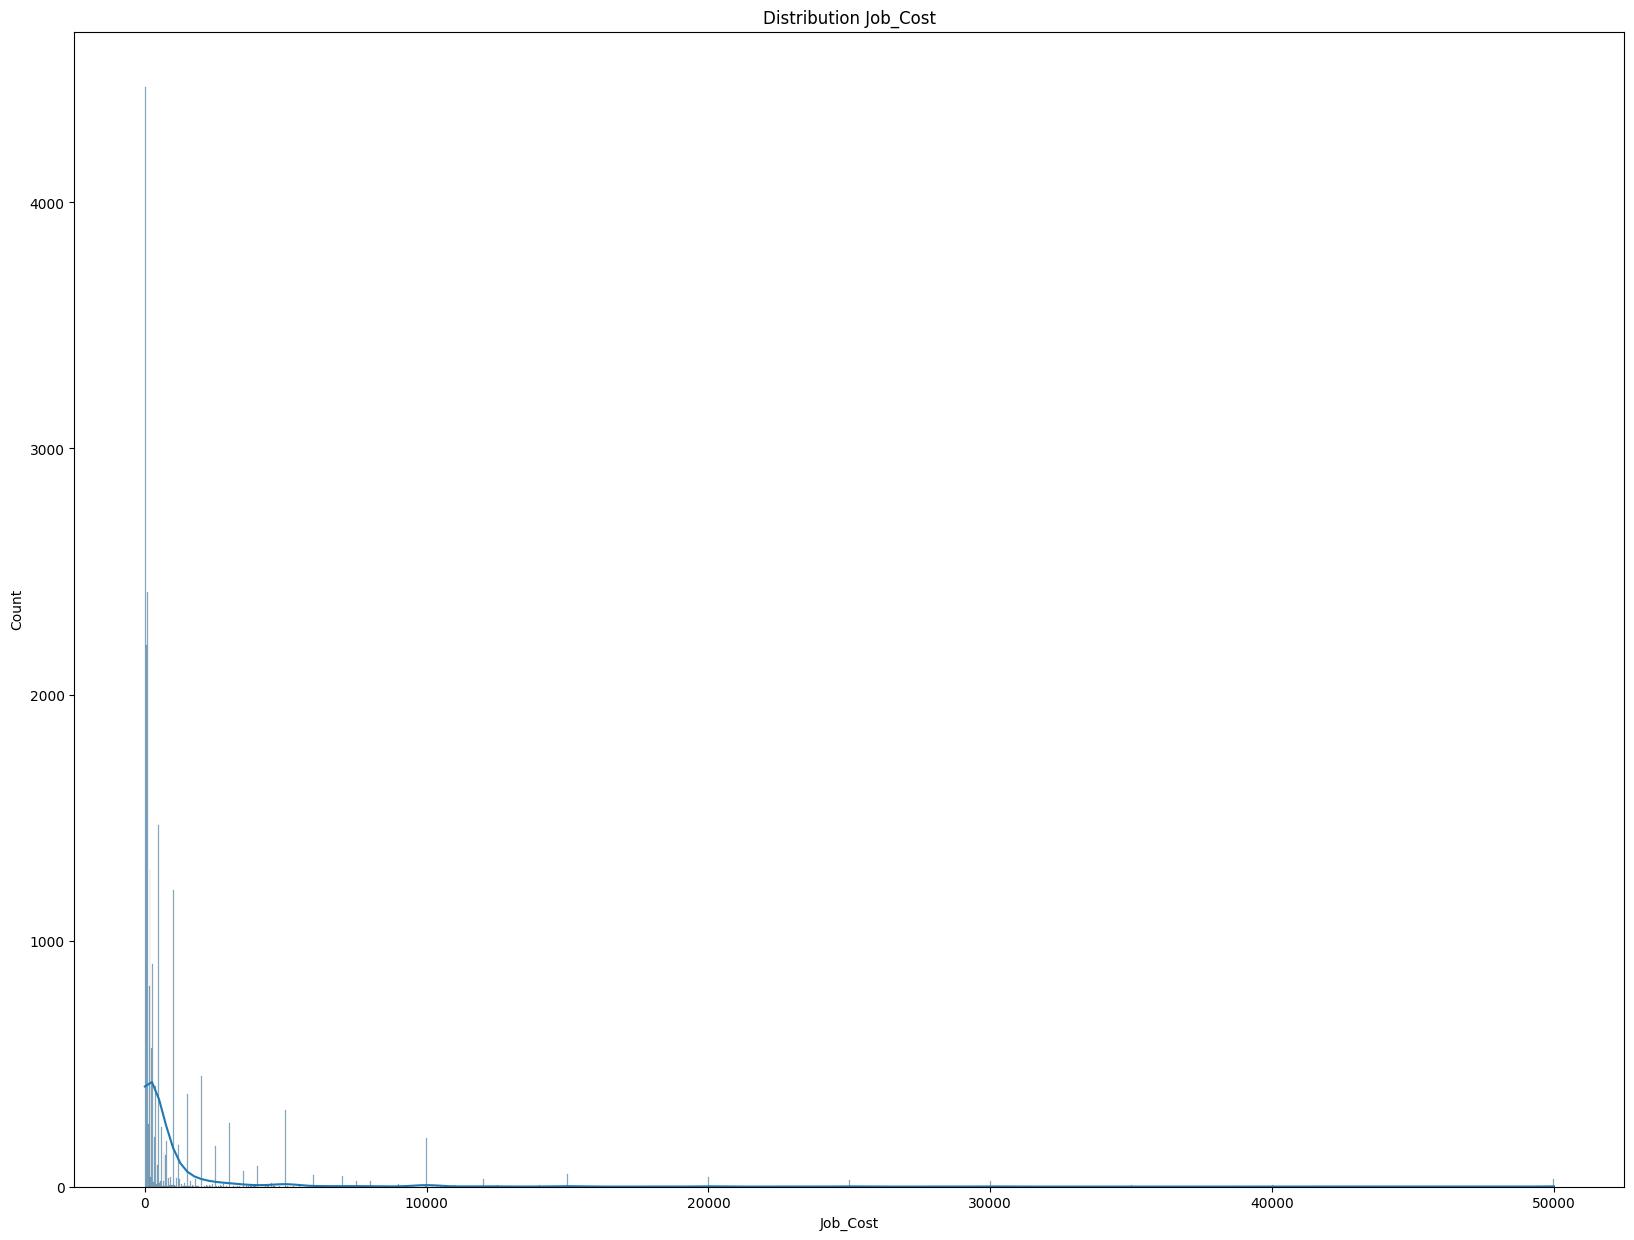

In [62]:
plt.figure(figsize=(20, 15))

sns.histplot(nnfixed['Job_Cost'], kde=True)
plt.title('Distribution Job_Cost')



Text(0.5, 1.0, 'Log Transformed Job_Cost')

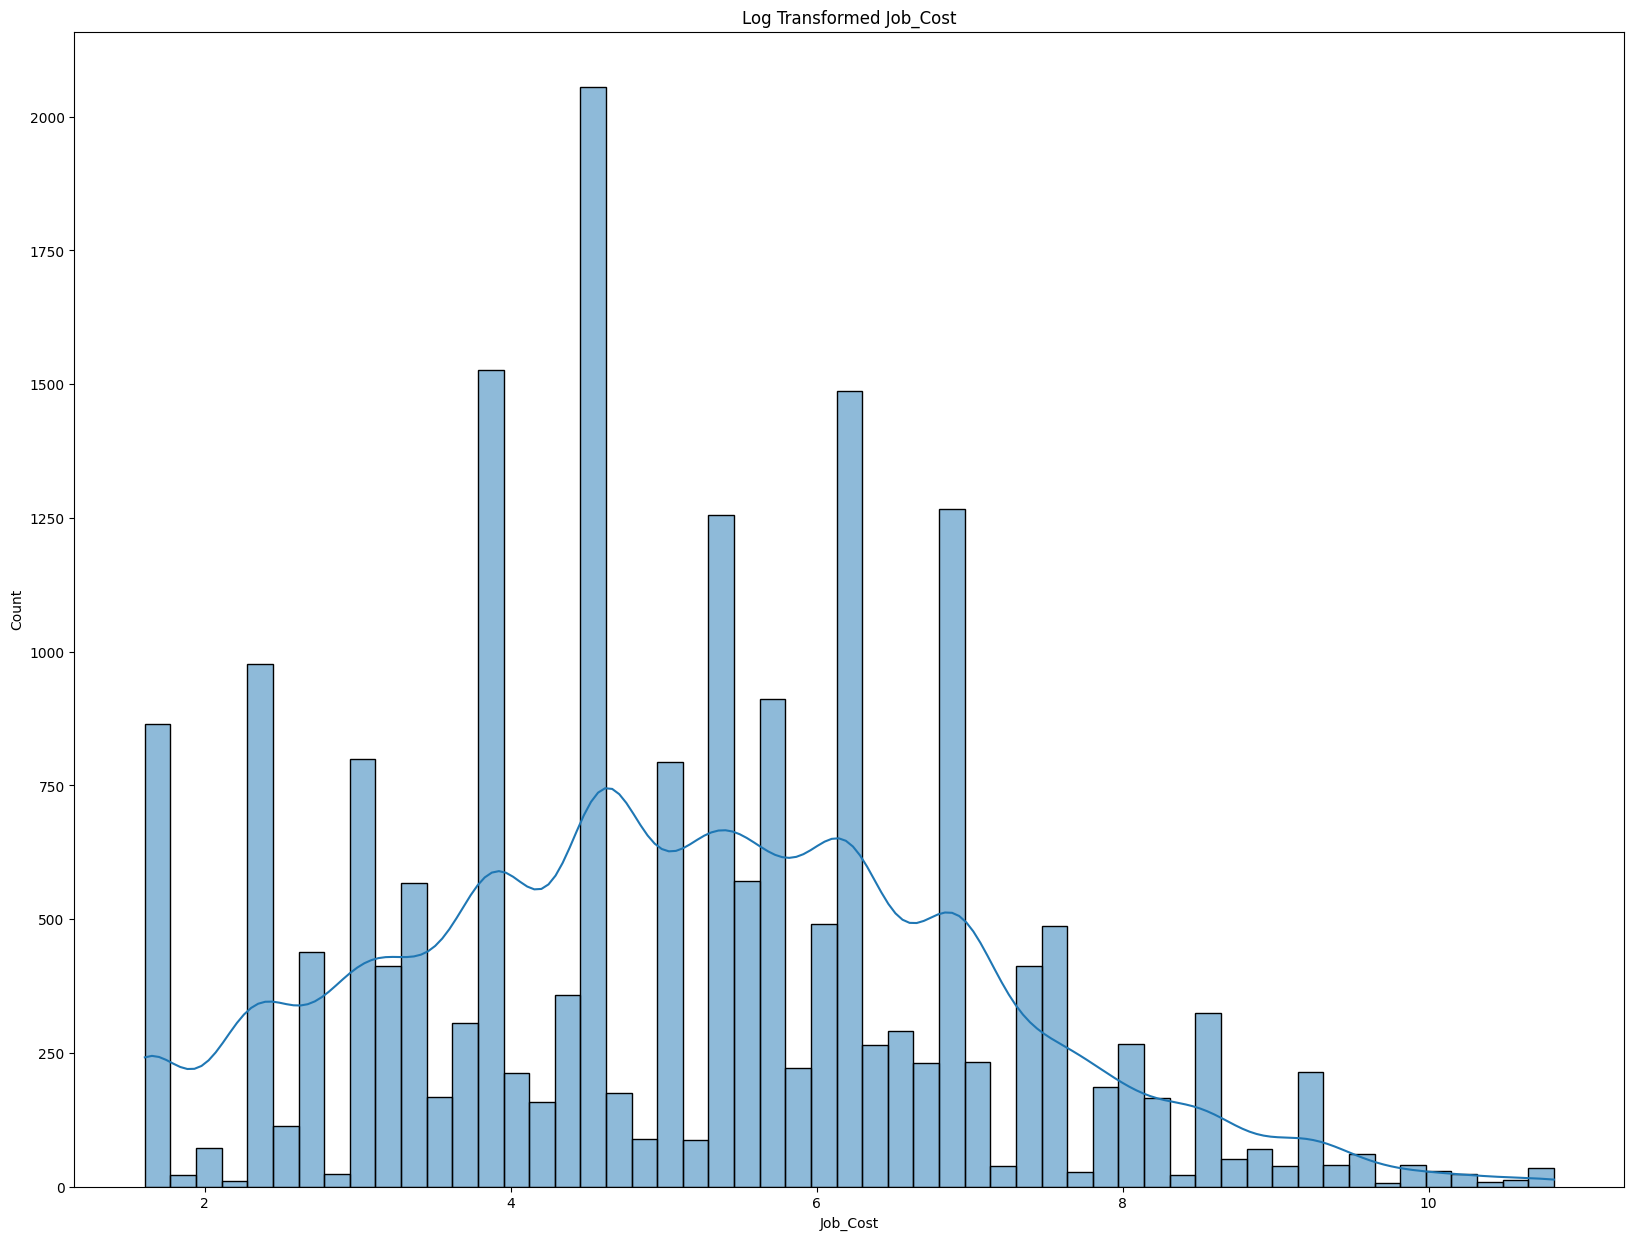

In [61]:
plt.figure(figsize=(20, 15))
job = nnfixed['Job_Cost'].copy()
job = np.log(job)
sns.histplot(job, kde=True, label='Log Transformed Job_Cost')
plt.title('Log Transformed Job_Cost')


In [ ]:
plt.figure(figsize=(20, 15))
job = nndata['Hourly_Rate'].copy()
job = np.log(job)
sns.histplot(job, kde=True)
plt.title('Log Transformed Hourly_Rate')

Text(0.5, 1.0, 'Hourly_Rate Scatter')

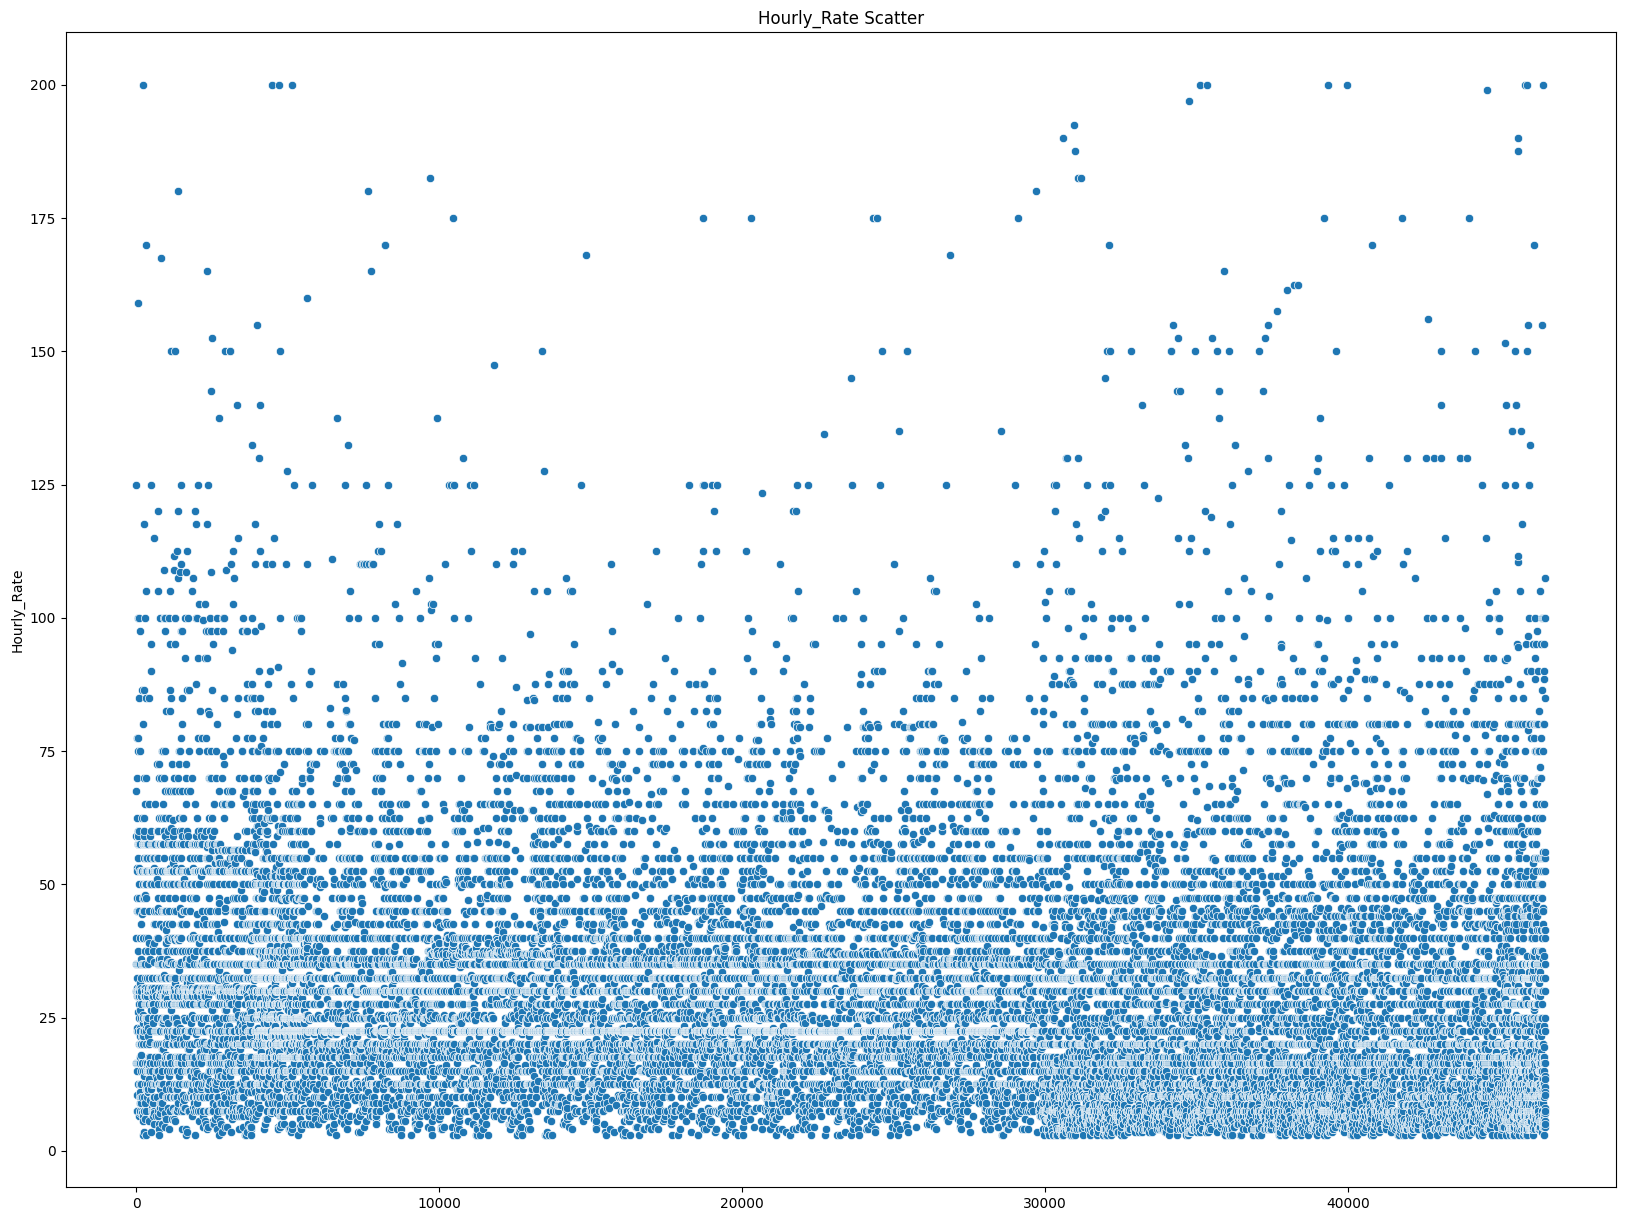

In [64]:
plt.figure(figsize=(20, 15))
sns.scatterplot(nndata['Hourly_Rate'])
plt.title('Hourly_Rate Scatter')

Text(0.5, 1.0, 'Hourly_Rate Distribution')

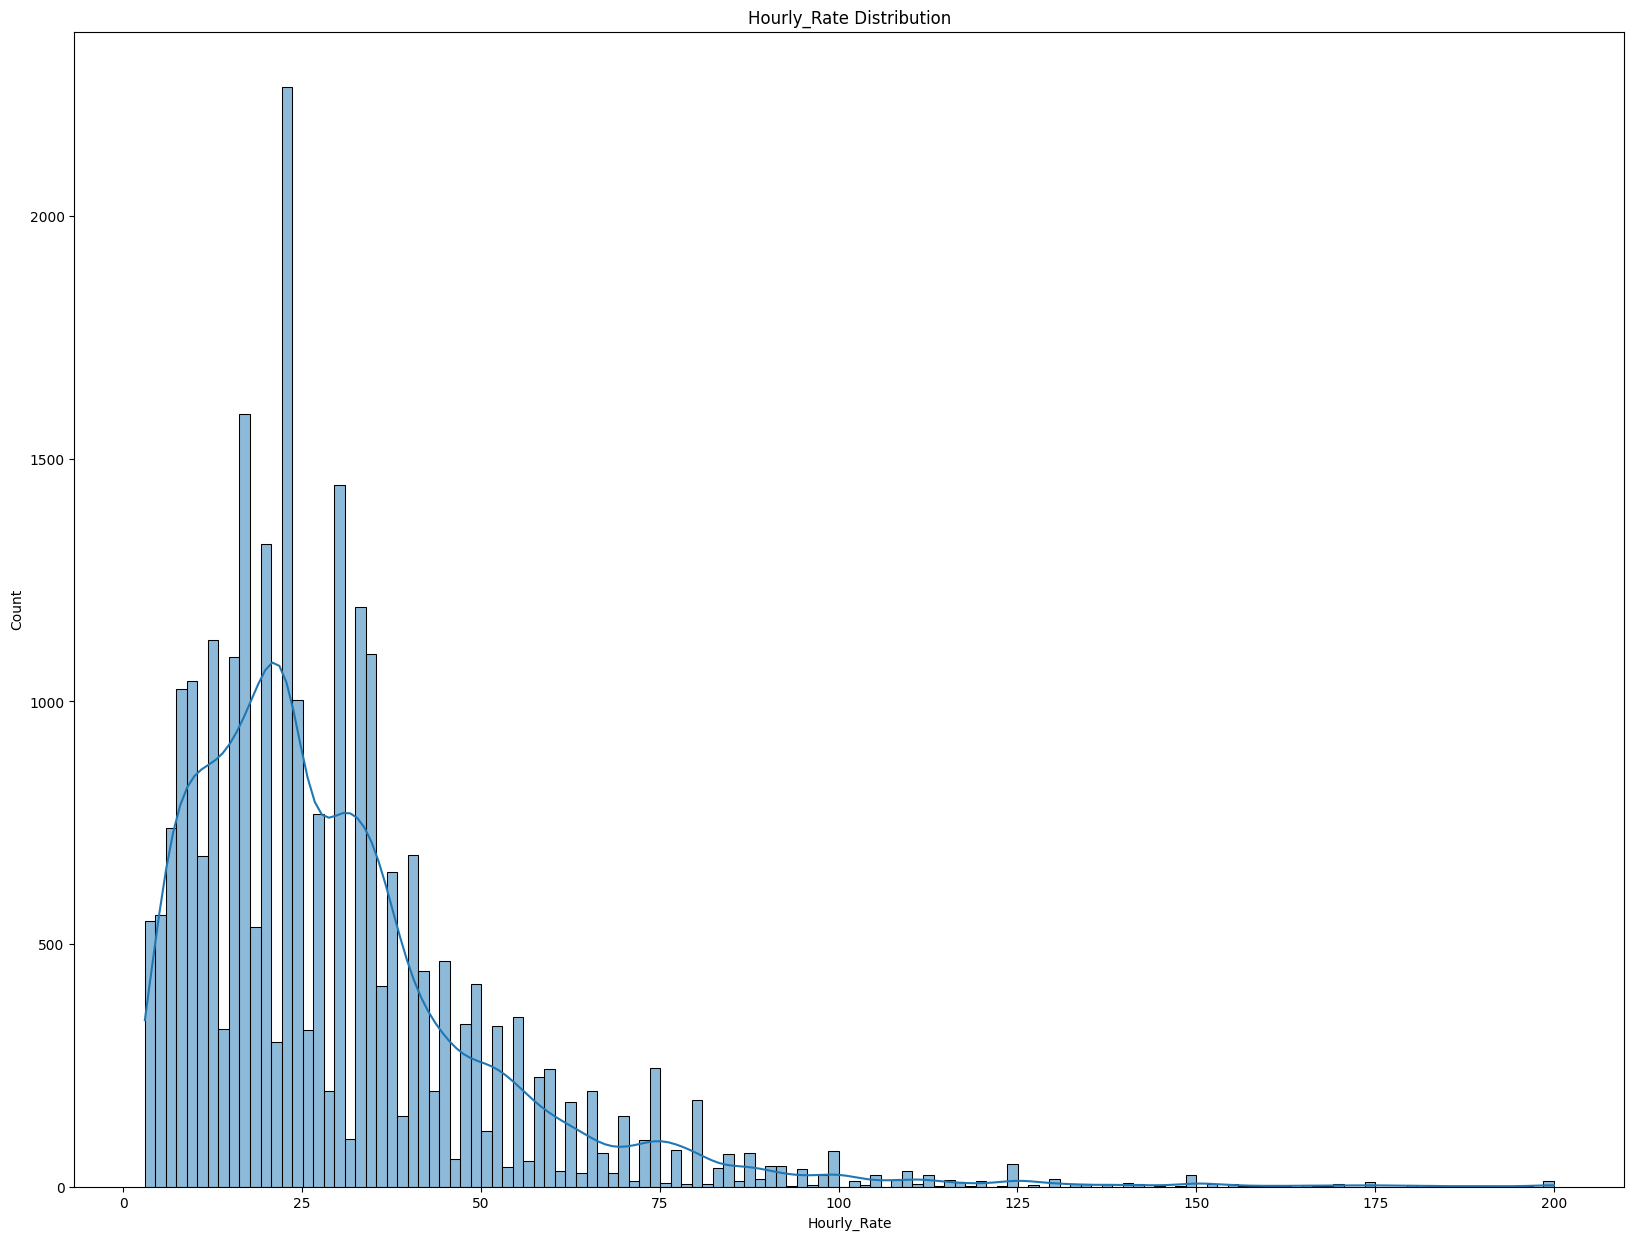

In [66]:
plt.figure(figsize=(20, 15))
sns.histplot(nndata['Hourly_Rate'], kde=True)
plt.title('Hourly_Rate Distribution')

120 hourly and 15000 fixed
change hourly with median

In [53]:
mean = nnfixed[nnfixed['Job_Cost'] <15000]['Job_Cost'].mean()
nnfixed.loc[nnfixed['Job_Cost'] > 15000, 'Job_Cost'] = mean

In [54]:
mean = nndata[nndata['Hourly_Rate'] <120]['Hourly_Rate'].mean()
nndata.loc[nndata['Hourly_Rate'] > 120, 'Hourly_Rate'] = mean

In [64]:
hourly_final = nndata.to_csv('/Users/sele/Desktop/AUS FALL 24/repositories/Data-Mining-Project/Dataset/hourly_final.csv', index=False)
fixed_final = nnfixed.to_csv('/Users/sele/Desktop/AUS FALL 24/repositories/Data-Mining-Project/Dataset/fixed_final.csv', index=False)

In [ ]:
hourly_pickle = nndata.to_pickle('/Users/sele/Desktop/AUS FALL 24/repositories/Data-Mining-Project/Dataset/hourly.pkl')  # Save as pickle



In [68]:
fixed_pickle = nnfixed.to_pickle('/Users/sele/Desktop/AUS FALL 24/repositories/Data-Mining-Project/Dataset/fixed.pkl')

In [65]:
nndata.head()

,Payment_Situation_Payment verified,Hourly_Rate,EX_level_demand,Spent,Connects,Feedback_Num,Applicants_Num,Client_Country_Aland Islands,Client_Country_Albania,Client_Country_Algeria,Client_Country_American Samoa,Client_Country_Andorra,Client_Country_Angola,Client_Country_Anguilla,Client_Country_Argentina,Client_Country_Armenia,Client_Country_Australia,Client_Country_Austria,Client_Country_Azerbaijan,Client_Country_Bahamas,Client_Country_Bahrain,Client_Country_Bangladesh,Client_Country_Barbados,Client_Country_Belgium,Client_Country_Belize,Client_Country_Benin,Client_Country_Bermuda,Client_Country_Bolivia,Client_Country_Bosnia and Herzegovina,Client_Country_Brazil,Client_Country_British Indian Ocean Territory,Client_Country_British Virgin Islands,Client_Country_Brunei Darussalam,Client_Country_Bulgaria,Client_Country_Cambodia,Client_Country_Cameroon,Client_Country_Canada,Client_Country_Cayman Islands,Client_Country_Chile,Client_Country_China,Client_Country_Colombia,Client_Country_Costa Rica,Client_Country_Cote d'Ivoire,Client_Country_Croatia,Client_Country_Curacao,Client_Country_Cyprus,Client_Country_Czech Republic,Client_Country_Denmark,Client_Country_Dominican Republic,Client_Country_Ecuador,Client_Country_Egypt,Client_Country_El Salvador,Client_Country_Estonia,Client_Country_Ethiopia,Client_Country_Finland,Client_Country_France,Client_Country_Gambia,Client_Country_Georgia,Client_Country_Germany,Client_Country_Ghana,Client_Country_Gibraltar,Client_Country_Greece,Client_Country_Greenland,Client_Country_Grenada,Client_Country_Guatemala,Client_Country_Guernsey,Client_Country_Guinea,Client_Country_Haiti,Client_Country_Honduras,Client_Country_Hong Kong,Client_Country_Hungary,Client_Country_Iceland,Client_Country_India,Client_Country_Indonesia,Client_Country_Ireland,Client_Country_Isle of Man,Client_Country_Israel,Client_Country_Italy,Client_Country_Jamaica,Client_Country_Japan,Client_Country_Jersey,Client_Country_Jordan,Client_Country_Kazakhstan,Client_Country_Kenya,Client_Country_Kuwait,Client_Country_Kyrgyzstan,Client_Country_Laos,Client_Country_Latvia,Client_Country_Lebanon,Client_Country_Liechtenstein,Client_Country_Lithuania,Client_Country_Luxembourg,Client_Country_Macao,Client_Country_Macedonia,Client_Country_Malaysia,Client_Country_Maldives,Client_Country_Mali,Client_Country_Malta,Client_Country_Mauritius,Client_Country_Mexico,"Client_Country_Micronesia, Federated States of",Client_Country_Moldova,Client_Country_Monaco,Client_Country_Mongolia,Client_Country_Montenegro,Client_Country_Morocco,Client_Country_Mozambique,Client_Country_Myanmar,Client_Country_Nepal,Client_Country_Netherlands,Client_Country_New Zealand,Client_Country_Nicaragua,Client_Country_Nigeria,Client_Country_Norway,Client_Country_Oman,Client_Country_Pakistan,Client_Country_Palestinian Territories,Client_Country_Panama,Client_Country_Papua New Guinea,Client_Country_Paraguay,Client_Country_Peru,Client_Country_Philippines,Client_Country_Poland,Client_Country_Portugal,Client_Country_Puerto Rico,Client_Country_Qatar,Client_Country_Romania,Client_Country_Russia,Client_Country_Rwanda,Client_Country_Saint Martin (French part),Client_Country_Saint Vincent and the Grenadines,Client_Country_Saudi Arabia,Client_Country_Senegal,Client_Country_Serbia,Client_Country_Seychelles,Client_Country_Singapore,Client_Country_Slovakia,Client_Country_Slovenia,Client_Country_Somalia,Client_Country_South Africa,Client_Country_South Korea,Client_Country_Spain,Client_Country_Sri Lanka,Client_Country_Suriname,Client_Country_Swaziland,Client_Country_Sweden,Client_Country_Switzerland,Client_Country_Taiwan,Client_Country_Tanzania,Client_Country_Thailand,Client_Country_Trinidad and Tobago,Client_Country_Tunisia,Client_Country_Turkey,Client_Country_Turks and Caicos Islands,Client_Country_Uganda,Client_Country_Ukraine,Client_Country_United Arab Emirates,Client_Country_United Kingdom,Client_Country_United States,Client_Country_United States Minor Outlying Islands,Client_Country_United States Virg

In [55]:
from sklearn.preprocessing import MinMaxScaler

# Extract input features
X_embeddings_hourly = np.stack(nndata['row_embedding'].values)  # Convert list of embeddings to a numpy array
# Add numerical features (drop target and embedding columns)
numerical_hourly = nndata.drop(columns=['Hourly_Rate', 'row_embedding'], axis=1)
# Combine embeddings and numerical features
X_hourly = np.hstack((X_embeddings_hourly, numerical_hourly.values))
# Extract the target variable
y_hourly =nndata['Hourly_Rate'].values


# Extract input features
X_embeddings_fixed = np.stack(nnfixed['row_embedding'].values)  # Convert list of embeddings to a numpy array

# Add numerical features (drop target and embedding columns)
numerical_fixed = nnfixed.drop(columns=['Job_Cost', 'row_embedding'], axis=1)

# Combine embeddings and numerical features
X_fixed = np.hstack((X_embeddings_fixed, numerical_fixed.values))

# Extract the target variable
y_fixed =nnfixed['Job_Cost'].values




In [49]:
X_fixed.shape

(20016, 462)

In [56]:
from sklearn.model_selection import train_test_split

# Split into train and test sets
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X_hourly, y_hourly, test_size=0.2, random_state=42)
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_fixed, y_fixed, test_size=0.2, random_state=42)


In [52]:
print(X_train_h[:1].shape)  # Show the first 5 rows

(1, 462)


## FNN

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

# Model definition
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

model1 = Sequential([
    Input(shape=(X_train_f.shape[1],)),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(1, activation='linear')
])

model1.compile(optimizer=Adam(learning_rate=0.0005), loss='mse', metrics=['mae'])



# Define early stopping
#early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Early stopping
history = model1.fit(
    X_train_f, y_train_f,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)







2024-12-02 19:07:55.955508: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
801/801 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 2952790.7500 - mae: 744.5086 - val_loss: 3204255.7500 - val_mae: 780.9612
Epoch 2/100
801/801 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2809593.5000 - mae: 816.7542 - val_loss: 2909702.2500 - val_mae: 818.5113
Epoch 3/100
801/801 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2378914.7500 - mae: 747.8832 - val_loss: 2743242.0000 - val_mae: 768.0926
Epoch 4/100
801/801 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2363428.7500 - mae: 714.9980 - val_loss: 2669183.0000 - val_mae: 700.3675
Epoch 5/100
801/801 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2283371.7500 - mae: 689.6766 - val_loss: 2639871.2500 - val_mae: 765.8580
Epoch 6/100
801/801 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2533865.7500 - mae: 724.6252 - val_loss: 2618673.5000 - val_mae: 681.4216
Epoch 7/100
801/801 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2069407.0000 - mae: 646.9960 - val_loss: 2605105.5000 - val_mae: 697.3284
Epoch 8/100
801/801 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - 

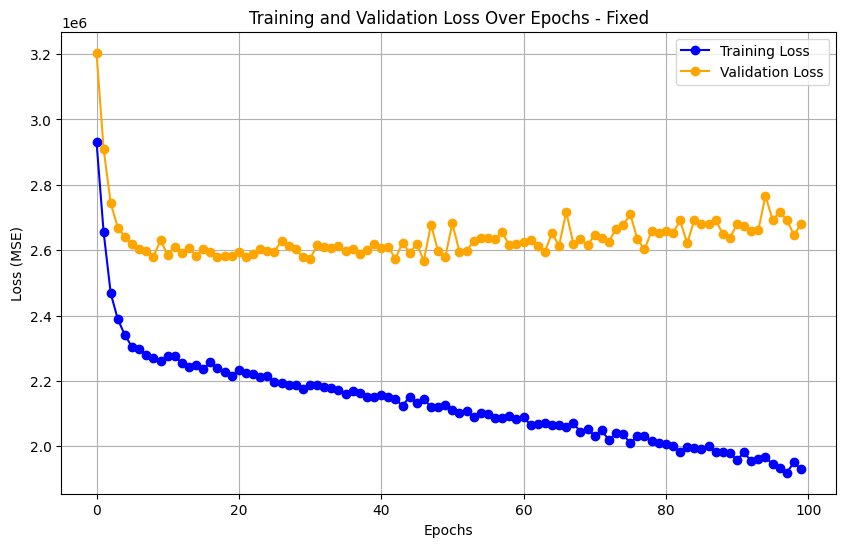

In [58]:
import matplotlib.pyplot as plt

# Assuming the `history` object is returned from the model.fit() function
# Example:
# history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', marker='o')
plt.title('Training and Validation Loss Over Epochs - Fixed')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()


In [68]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predict on X_test
y_pred = model1.predict(X_test).flatten()

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)  # R-squared (only for regression)
rmse = np.sqrt(mse)

# Print results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mean Squared Error (MSE): 440.80
Mean Absolute Error (MAE): 14.65
R-squared (R²): 0.09
Root Mean Squared Error (RMSE): 21.00


## Decision Tree

In [59]:
# Initialize models
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import tqdm as notebook_tqdm
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
import seaborn as sns



hourly_model = XGBRegressor()
fixed_model = XGBRegressor()


In [60]:
hourly_model.fit(X_train_h, y_train_h)
fixed_model.fit(X_train_f, y_train_f)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [61]:
# Predictions
hourly_preds = hourly_model.predict(X_test_h)
fixed_preds = fixed_model.predict(X_test_f)

In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score

def evaluate(y_test, predictions, normalization='range'):
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    medae = median_absolute_error(y_test, predictions)  # Calculate MedAE
    r2 = r2_score(y_test, predictions)
    rmse = np.sqrt(mse)  # Calculate RMSE
    
    if normalization == 'range':
        # NRMSE using range
        nrmse = rmse / (y_test.max() - y_test.min())
    elif normalization == 'mean':
        # NRMSE using mean
        nrmse = rmse / y_test.mean()
    else:
        raise ValueError("Invalid normalization method. Use 'range' or 'mean'.")
    
    return mse, mae, medae, r2, rmse, nrmse

# Evaluate hourly model
hourly_metrics = evaluate(y_test_h, hourly_preds, normalization='range')
print(f"Hourly Model - MSE: {hourly_metrics[0]}, MAE: {hourly_metrics[1]}, MedAE: {hourly_metrics[2]}, R2: {hourly_metrics[3]}, RMSE: {hourly_metrics[4]}, NRMSE: {hourly_metrics[5]}")

# Evaluate fixed model
fixed_metrics = evaluate(y_test_f, fixed_preds, normalization='range')
print(f"Fixed Model - MSE: {fixed_metrics[0]}, MAE: {fixed_metrics[1]}, MedAE: {fixed_metrics[2]}, R2: {fixed_metrics[3]}, RMSE: {fixed_metrics[4]}, NRMSE: {fixed_metrics[5]}")

Hourly Model - MSE: 317.37600857624136, MAE: 13.243827505713535, MedAE: 10.287114143371582, R2: 0.12600615718671915, RMSE: 17.81505005820195, NRMSE: 0.1522653851128372
Fixed Model - MSE: 2512065.5843117405, MAE: 706.0252147458255, MedAE: 237.59280395507812, R2: 0.17582291917491555, RMSE: 1584.9497103415429, NRMSE: 0.10569854687172676
